# Projet 3 : Clustering et Analyses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os
import seaborn as sns
from random import sample
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import Imputer
from scipy import stats
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import (manifold, datasets, decomposition,
                     ensemble, discriminant_analysis, random_projection)

%matplotlib inline

plt.style.use('seaborn-notebook')
sns.set_style('ticks')
sns.set(rc={'figure.figsize': (11, 7)})
sns.set(rc={'font.size': 24})
# Paramètre de transparence
alpha = 0.5

os.getcwd()
os.chdir("C:/Users/flemeill/Documents/01 - Projets OC/03 - Projet 3/Main project")

In [2]:
def distri_plot(Var, X):
    """Fonction permettant d'afficher la distribution statistique d'une variable (courbe + histogramme)"""
    sns.distplot(Var)
    plt.xlabel(X, fontsize=18)
    plt.ylabel("Distribution", fontsize=18)
    plt.title("Distribution de " + X, fontsize=24)
    print("La médiane de ", X, "est de ", Var.median())
    print("La moyenne de ", X, "est de ", Var.mean())


def boxplot1d(X, title):
    """Fonction permettant d'afficher la distribution statistique d'une variable en boite à moustache"""
    sns.boxplot(X)
    plt.title(title, fontsize=24)
    print(X.describe())


def cluster_count(labels):
    """Fonction qui permet d'afficher le nombre de cluster et le nombre d'individus par cluster"""
    Count = []
    Nb_cluster = labels.max() + 1
    print('Il y a ', Nb_cluster, ' clusters différents')

    Count = np.bincount(labels)
    # barplot
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(121)
    sns.barplot(x=np.arange(1, Nb_cluster + 1),
                y=Count, ax=ax, palette='Dark2') 
    plt.title('Visualisation du nombre de cluster et de leur volume', fontsize=18)

    # pie chart
    ax = fig.add_subplot(122)
    ax.pie(Count, labels=np.arange(1, Nb_cluster + 1),
           autopct='%1.1f%%')
    plt.title('Répartition du nombre de points au sein des clusters', fontsize=18)

    plt.show()

## Import des différents data set d'analyse

In [3]:
data = pd.read_csv("data_clean.csv")
print(data.columns)

quant = pd.read_csv("data_quant.csv")
print(quant.columns)

Index(['CustomerID', 'recency', 'frequency', 'monetary_value', 'Mean Quantity',
       'Mean UnitPrice'],
      dtype='object')
Index(['CustomerID', 'r_quartile', 'f_quartile', 'm_quartile', 'q_quartile',
       'pu_quartile'],
      dtype='object')


#### Séparation des variables explicatives et de 'CustomerID'

In [4]:
# définition de X et y (Pour data)
todrop = ['CustomerID']
X_data = pd.DataFrame(data.drop(columns=todrop))
y_data = data.CustomerID

# définition de X et y (Pour quant)
todrop = ['CustomerID']
X_quant = pd.DataFrame(quant.drop(columns=todrop))
y_quant = quant.CustomerID

## Centrage et réduction des variables

In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_data)
X_data_sc = scaler.transform(X_data)

scaler2 = preprocessing.StandardScaler()
scaler2.fit(X_quant)
X_quant_sc = scaler2.transform(X_quant)

# Analyse et classification du jeu de données normalisé

## Hierarchical clustering

#### Dendrograms

On décide couper les dendrogrammmes à 12 clusters. Un plus grand nombre de cluster deviendrait difficile à analyser dans la suite

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

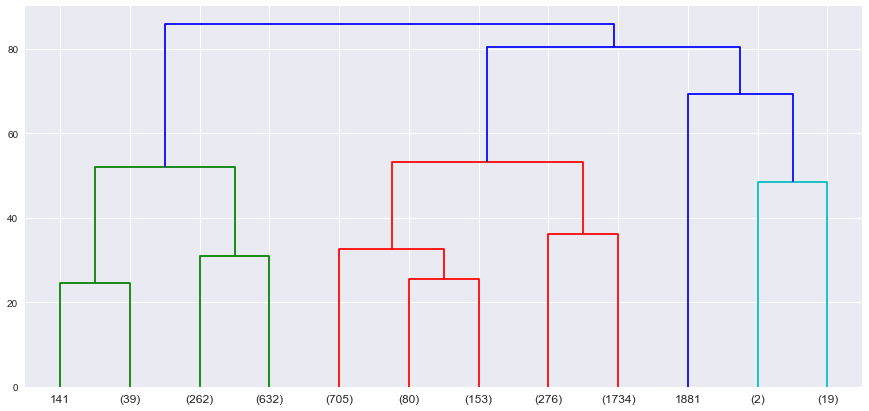

In [7]:
# Méthode de Ward
Link = linkage(X_data_sc, 'ward')
fig = plt.figure(figsize=(15, 7))
dn = dendrogram(Link, p=12, truncate_mode='lastp')

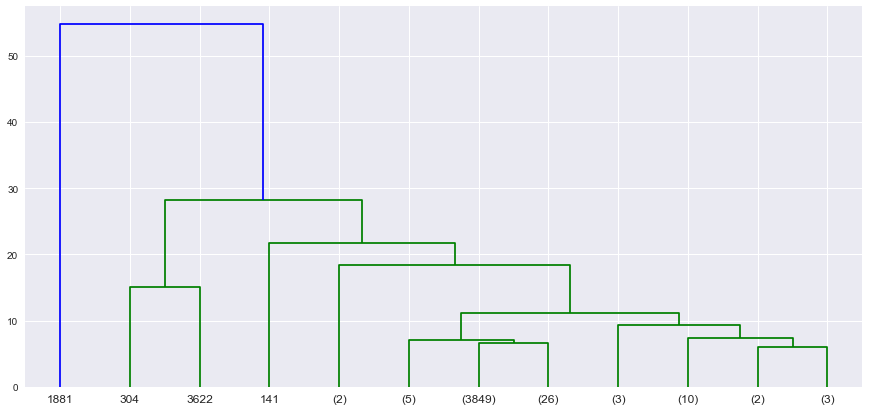

In [8]:
# En utilisant le lien moyen 
Link = linkage(X_data_sc, 'average')
fig = plt.figure(figsize=(15, 7))
dn = dendrogram(Link, p=12, truncate_mode='lastp')

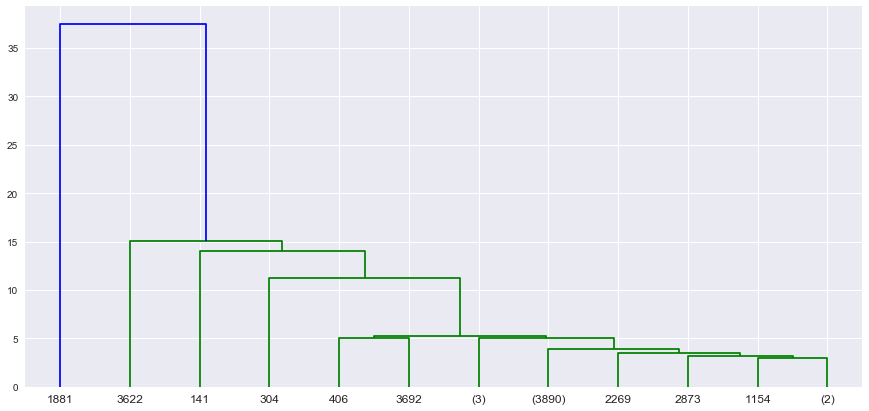

In [9]:
# En utilisant le lien simple
Link = linkage(X_data_sc, 'single')
fig = plt.figure(figsize=(15, 7))
dn = dendrogram(Link, p=12, truncate_mode='lastp')

## Agglomerative clustering

Il y a  5  clusters différents


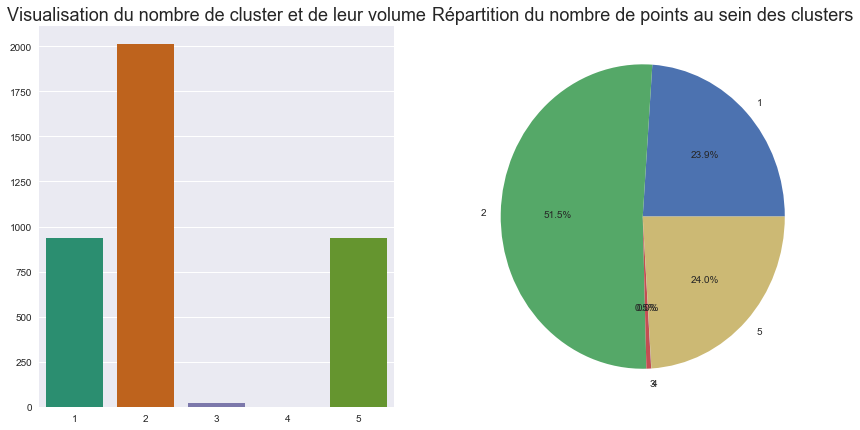

Silhouette Coefficient: 0.286


In [10]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage='ward', n_clusters=5)
model.fit(X_data_sc)
cluster_count(model.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, model.labels_))

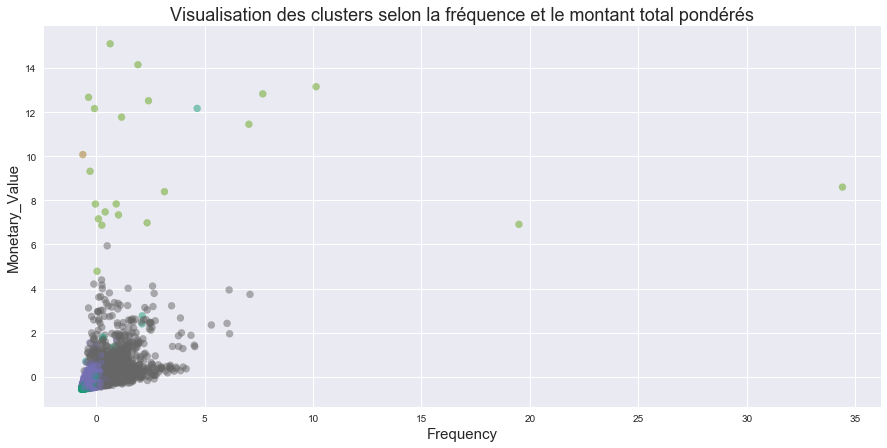

In [11]:
fig = plt.figure(figsize=(15, 7))

plt.scatter(X_data_sc[:,1], X_data_sc[:,2], c=model.labels_, alpha=alpha, cmap='Dark2')
plt.scatter
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary_Value',fontsize=15)
plt.title('Visualisation des clusters selon la fréquence et le montant total pondérés', fontsize=18)

plt.show()

## K-Means

#### Implémentation de l'algorithme Kmeans pour différentes valeurs de n_clusters, visualisation et analyse des résultats

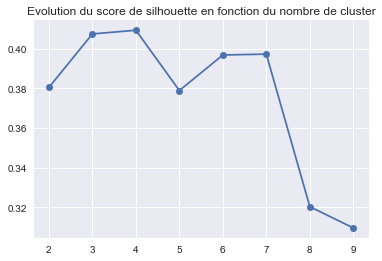

In [12]:
silhouette = []
for num_clusters in range(2, 10):
    cls = KMeans(n_clusters=num_clusters)
    cls.fit(X_data_sc)
    silh = silhouette_score(X_data_sc, cls.labels_)
    silhouette.append(silh)

plt.plot(range(2, 10), silhouette, marker='o')

plt.title('Evolution du score de silhouette en fonction du nombre de cluster')
plt.show()

### Decomposition en 2 composantes principales pour visualisation

In [13]:
from sklearn import decomposition 
pca = decomposition.PCA(n_components=2)
pca.fit(X_data_sc)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_data_sc)

[0.37741023 0.60114216]


Visualisation des clusters selon les 2 composantes principales obtenues par PCA

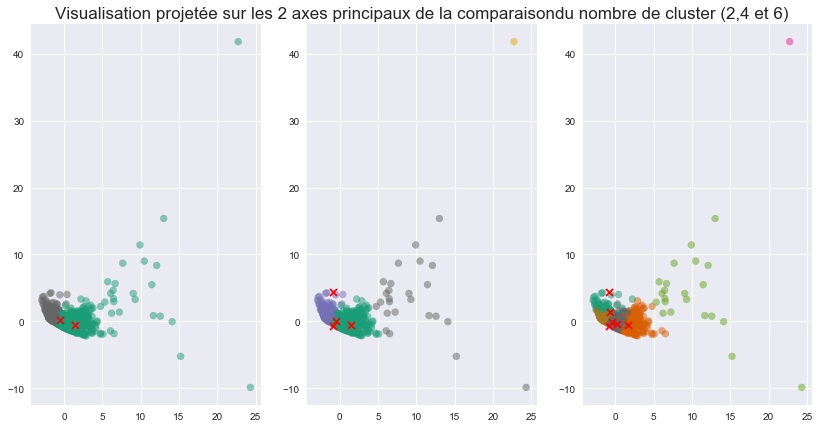

In [14]:
fig = plt.figure(figsize=(14, 7))

cls = KMeans(n_clusters=2)
cls.fit(X_data_sc)
ax = fig.add_subplot(131)
ax.scatter(X_trans[:, 0], X_trans[:, 1],
           c=cls.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls.cluster_centers_[:, 0], cls.cluster_centers_[:, 1],
           marker='x', cmap="YlGnBu", c=['r'])

cls4 = KMeans(n_clusters=4)
cls4.fit(X_data_sc)
ax = fig.add_subplot(132)
ax.scatter(X_trans[:, 0], X_trans[:, 1],
           c=cls4.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls4.cluster_centers_[:, 0], cls4.cluster_centers_[:, 1],
           marker='x', cmap="YlGnBu", c=['r'])
plt.title('Visualisation projetée sur les 2 axes principaux de la comparaison'
          'du nombre de cluster (2,4 et 6)', fontsize=17)

cls6 = KMeans(n_clusters=6)
cls6.fit(X_data_sc)
ax = fig.add_subplot(133)
ax.scatter(X_trans[:, 0], X_trans[:, 1],
           c=cls6.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls6.cluster_centers_[:, 0], cls6.cluster_centers_[:, 1],
           marker='x', cmap="YlGnBu",  c=['r'])

plt.show()

Analyse pour 2 clusters

[-0.5215234   0.17896239  0.1545941   0.03428246 -0.15244031]
[ 1.44375396 -0.4954287  -0.42796899 -0.09490551  0.42200658]
Il y a  2  clusters différents


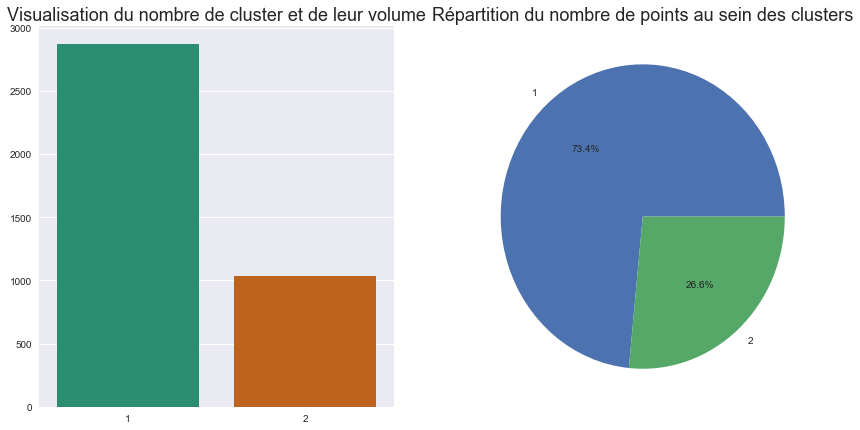

In [15]:
print(cls.cluster_centers_[0, :])
print(cls.cluster_centers_[1, :])
cluster_count(cls.labels_)

In [16]:
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, cls.labels_))

Silhouette Coefficient: 0.381


Analyse pour 3 clusters

[[ 1.46725616 -0.49845189 -0.42978772 -0.09608409  0.42881822]
 [-0.8298822   4.19743614  9.89361227  5.7904749   0.40451425]
 [-0.51228129  0.14261918  0.07263749 -0.01247006 -0.15490949]]
Il y a  3  clusters différents


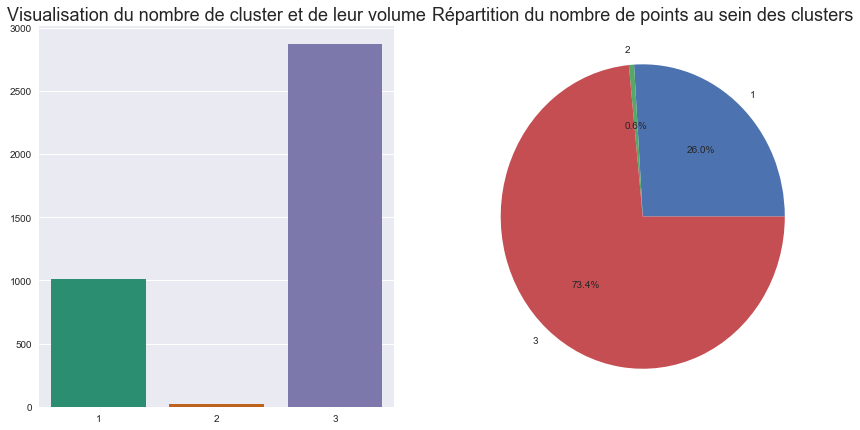

In [17]:
cls3 = KMeans(n_clusters=3)
cls3.fit(X_data_sc)
print(cls3.cluster_centers_)
cluster_count(cls3.labels_)

In [18]:
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, cls3.labels_))

Silhouette Coefficient: 0.407


Analyse pour 4 clusters

Il y a  4  clusters différents


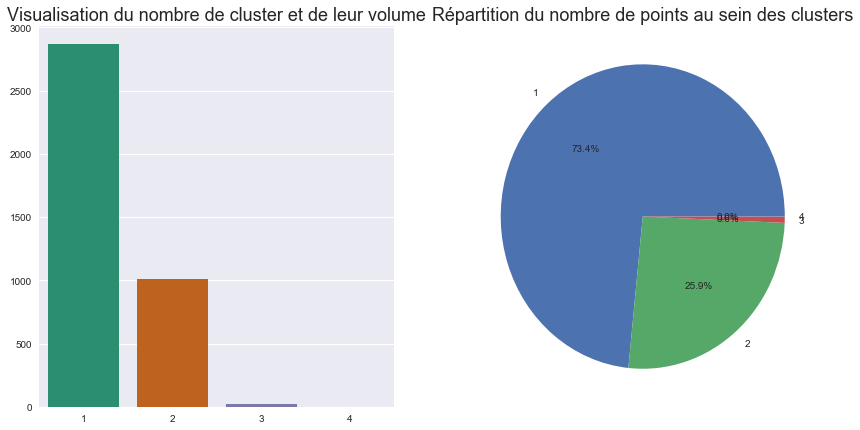

In [57]:
cls4 = KMeans(n_clusters=4)
cls4.fit(X_data_sc)
cluster_count(cls4.labels_)

In [20]:
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, cls4.labels_))

Silhouette Coefficient: 0.417


In [21]:
print(cls4.cluster_centers_)

[[ 1.47979779e+00 -5.00824078e-01 -4.31046345e-01 -9.56081687e-02
   4.36605747e-01]
 [-5.01687440e-01  9.48925428e-02  5.75083525e-03 -2.24766276e-02
  -1.60200610e-01]
 [-7.83180686e-01  2.69903932e+00  4.65763450e+00  1.20959511e+00
   1.63604403e-01]
 [-8.90723306e-01 -6.14026929e-01  1.00745888e+01  5.37407092e+01
  -3.11218167e-01]]


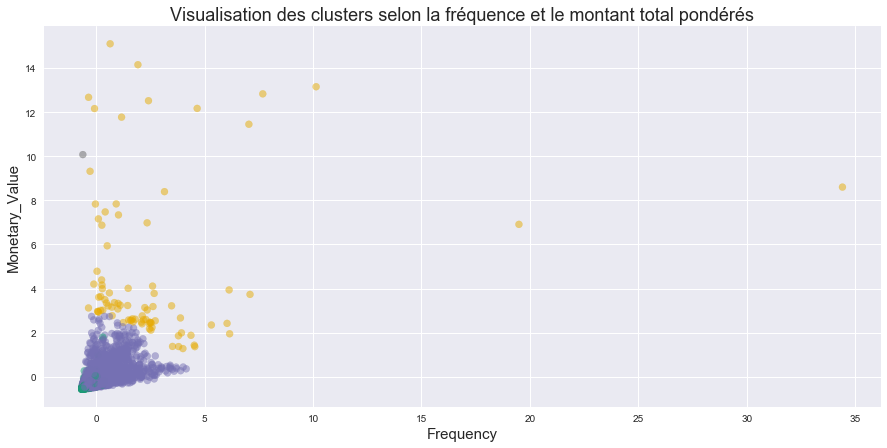

In [22]:
fig = plt.figure(figsize=(15, 7))

plt.scatter(X_data_sc[:, 1], X_data_sc[:, 2],
            c=cls4.labels_, alpha=alpha, cmap='Dark2')
plt.scatter
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary_Value', fontsize=15)
plt.title('Visualisation des clusters selon la fréquence et le montant total pondérés', fontsize=18)

plt.show()

Analyse pour 5 clusters

[[-7.56183747e-01  1.38808603e+00  1.00248888e+00  3.87397867e-03
  -2.51585354e-01]
 [ 1.58133581e+00 -5.04652661e-01 -4.38162958e-01 -1.06163271e-01
   4.29804905e-01]
 [-4.25716073e-01 -1.44089346e-01 -1.40944264e-01 -1.54313951e-02
  -1.11878739e-01]
 [-8.27116692e-01  4.41613901e+00  9.88538606e+00  3.61091880e+00
   4.37047542e-01]
 [-8.90723306e-01 -6.14026929e-01  1.00745888e+01  5.37407092e+01
  -3.11218167e-01]]
Il y a  5  clusters différents


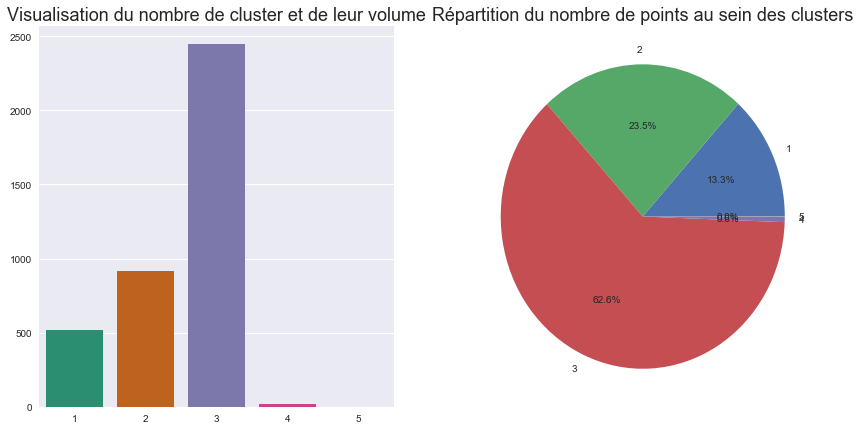

In [23]:
cls5 = KMeans(n_clusters=5)
cls5.fit(X_data_sc)
print(cls5.cluster_centers_)
cluster_count(cls5.labels_)

In [24]:
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, cls5.labels_))

Silhouette Coefficient: 0.379


Visualisation 

Silhouette Coefficient: 0.409


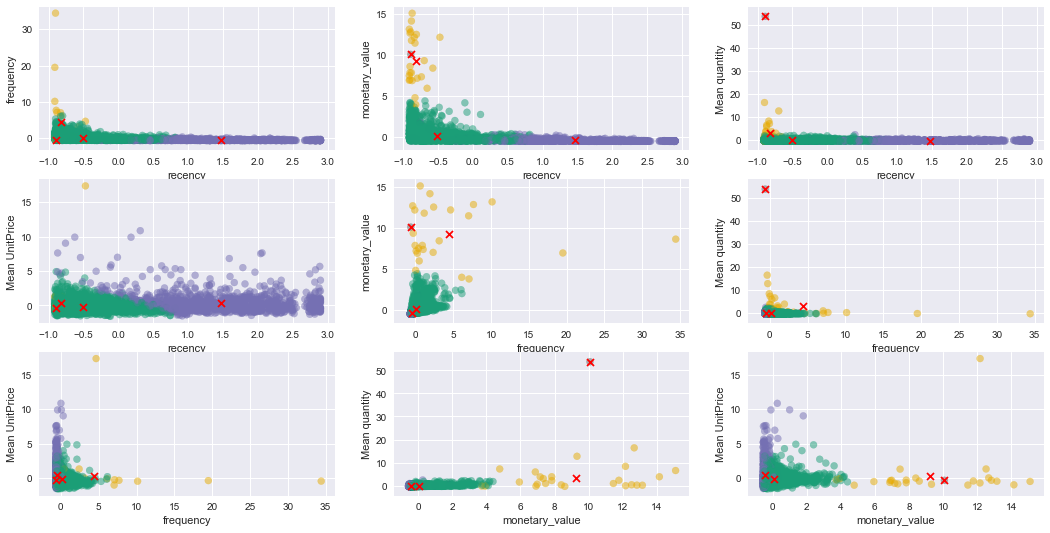

In [60]:
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X_data_sc, cls4.labels_))
fig = plt.figure(figsize=(18, 9))

ax = fig.add_subplot(331)
ax.scatter(X_data_sc[:, 0], X_data_sc[:, 1],
           c=cls4.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls4.cluster_centers_[:, 0], cls4.cluster_centers_[:, 1],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('recency')
ax.set_ylabel('frequency')

ax = fig.add_subplot(332)
ax.scatter(X_data_sc[:, 0], X_data_sc[:, 2],
           c=cls4.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls4.cluster_centers_[:, 0], cls4.cluster_centers_[:, 2],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('recency')
ax.set_ylabel('monetary_value')

ax = fig.add_subplot(333)
ax.scatter(X_data_sc[:, 0], X_data_sc[:, 3],
           c=cls4.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls4.cluster_centers_[:, 0], cls4.cluster_centers_[:, 3],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('recency')
ax.set_ylabel('Mean quantity')

ax = fig.add_subplot(334)
ax.scatter(X_data_sc[:, 0], X_data_sc[:, 4],
           c=cls4.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls4.cluster_centers_[:, 0], cls4.cluster_centers_[:, 4],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('recency')
ax.set_ylabel('Mean UnitPrice')

ax = fig.add_subplot(335)
ax.scatter(X_data_sc[:, 1], X_data_sc[:, 2],
           c=cls4.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls4.cluster_centers_[:, 1], cls4.cluster_centers_[:, 2],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency')
ax.set_ylabel('monetary_value')
ax = fig.add_subplot(336)
ax.scatter(X_data_sc[:, 1], X_data_sc[:, 3],
           c=cls4.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls4.cluster_centers_[:, 1], cls4.cluster_centers_[:, 3],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency')
ax.set_ylabel('Mean quantity')

ax = fig.add_subplot(337)
ax.scatter(X_data_sc[:, 1], X_data_sc[:, 4],
           c=cls4.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls4.cluster_centers_[:, 1], cls4.cluster_centers_[:, 4],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency')
ax.set_ylabel('Mean UnitPrice')

ax = fig.add_subplot(338)
ax.scatter(X_data_sc[:, 2], X_data_sc[:, 3],
           c=cls4.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls4.cluster_centers_[:, 2], cls4.cluster_centers_[:, 3],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('monetary_value')
ax.set_ylabel('Mean quantity')

ax = fig.add_subplot(339)
ax.scatter(X_data_sc[:, 2], X_data_sc[:, 4],
           c=cls4.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls4.cluster_centers_[:, 2], cls4.cluster_centers_[:, 4],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('monetary_value')
ax.set_ylabel('Mean UnitPrice')

plt.show()

Analyse pour 7 clusters

[[-4.33246917e-01 -1.32486354e-01 -1.37801070e-01 -1.33398624e-02
  -1.97274607e-01]
 [ 2.71198774e-01 -4.15526127e-01 -2.09091197e-01 -1.14284322e-01
   2.67937782e+00]
 [-9.06044607e-01  2.69588815e+01  7.75619102e+00 -2.74955439e-01
  -3.91679537e-01]
 [ 1.63685186e+00 -4.99330124e-01 -4.46911521e-01 -9.12902086e-02
  -9.31282472e-03]
 [-8.11441652e-01  2.08318871e+00  9.90024027e+00  3.88395005e+00
   4.71551920e-01]
 [-7.57299059e-01  1.40044205e+00  9.82027768e-01 -5.46030110e-03
  -2.86702797e-01]
 [-8.90723306e-01 -6.14026929e-01  1.00745888e+01  5.37407092e+01
  -3.11218167e-01]]
Il y a  7  clusters différents


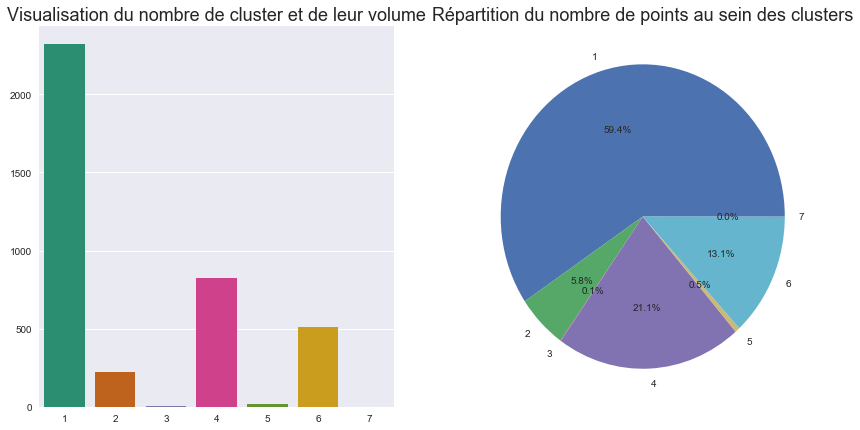

Silhouette Coefficient: 0.397


In [26]:
cls7 = KMeans(n_clusters=7)
cls7.fit(X_data_sc)
print(cls7.cluster_centers_)
cluster_count(cls7.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, cls7.labels_))

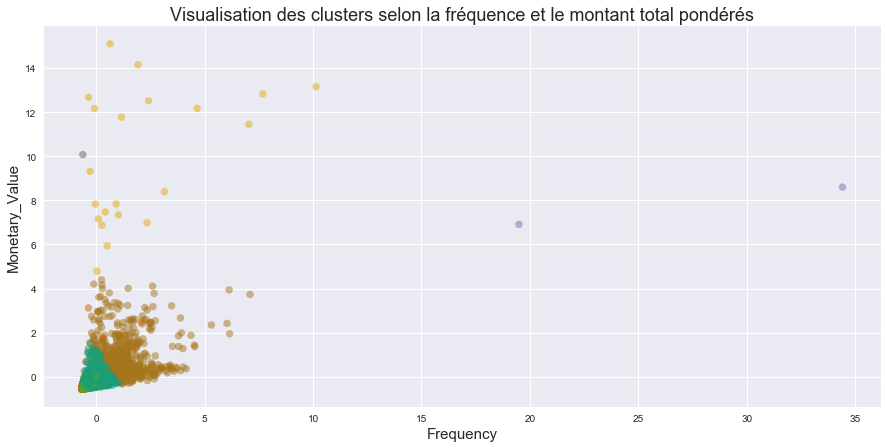

In [27]:
fig = plt.figure(figsize=(15, 7))

plt.scatter(X_data_sc[:,1], X_data_sc[:,2], c=cls7.labels_, alpha=alpha, cmap='Dark2')
plt.scatter
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary_Value',fontsize=15)
plt.title('Visualisation des clusters selon la fréquence et le montant total pondérés', fontsize=18)

plt.show()

## tSNE

In [28]:
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=5000, init='pca')
X_tsne = tsne.fit_transform(X_data_sc)

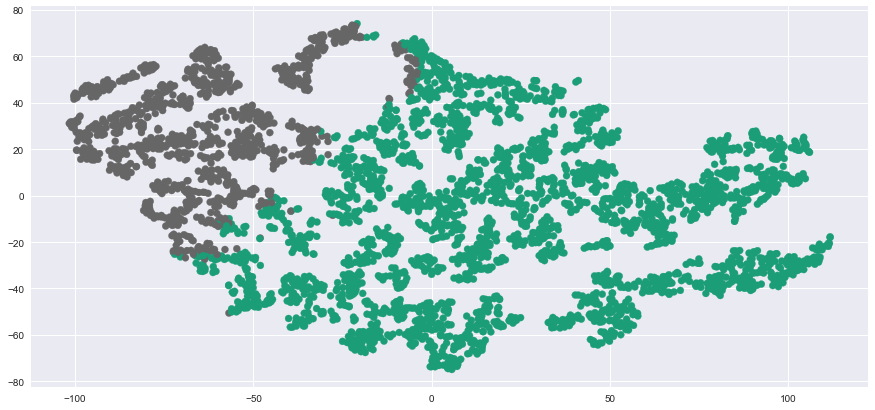

In [29]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cls.labels_, cmap='Dark2')
plt.show()

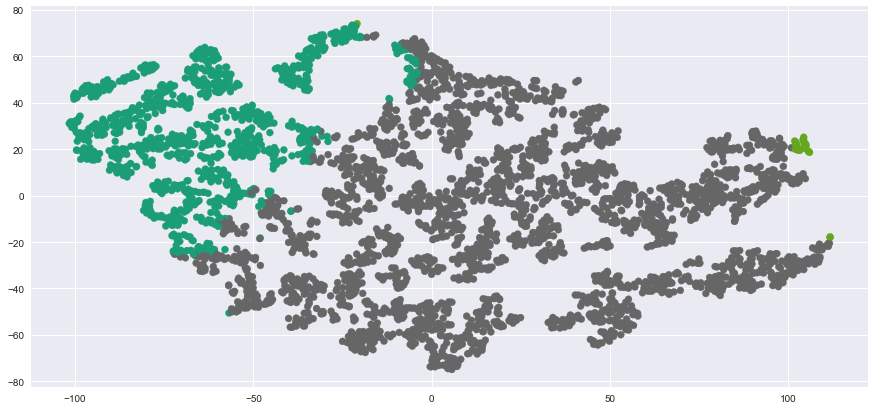

In [30]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cls3.labels_, cmap='Dark2')
plt.show()

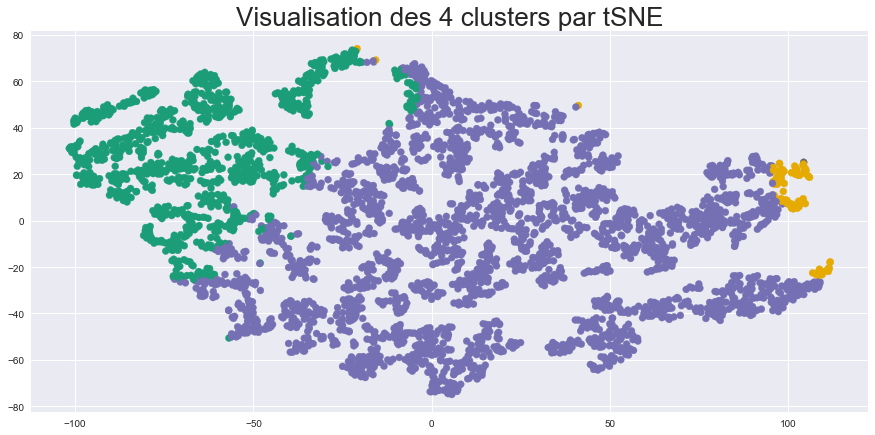

In [31]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cls4.labels_, cmap='Dark2')
plt.title('Visualisation des 4 clusters par tSNE', fontsize = 26)
plt.show()

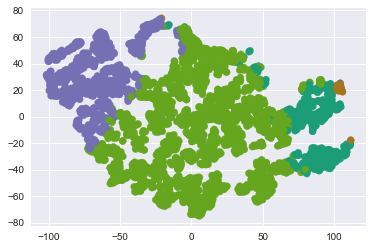

In [32]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cls5.labels_, cmap='Dark2')
plt.show()

## DBSCAN

[ 0 -1  0 ...  0  0  0]
Il y a  2  clusters différents


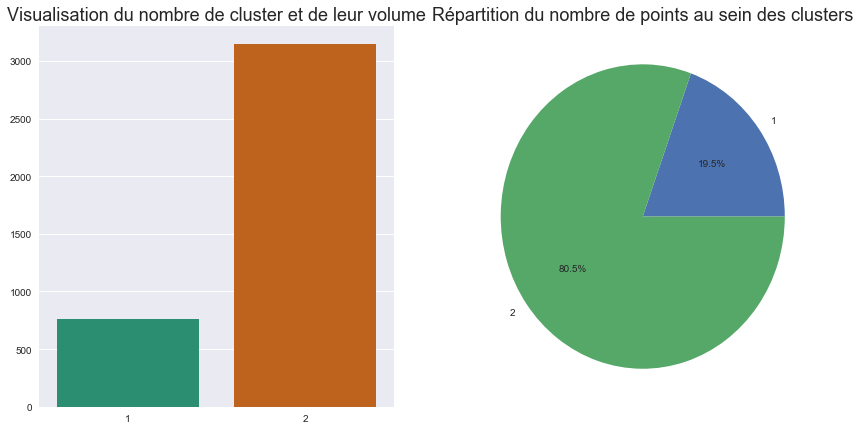

Silhouette Coefficient: 0.368


In [33]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN(eps=0.4, min_samples=30)
db.fit(X_data_sc)
print(db.labels_)
cluster_count(db.labels_ + 1)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, db.labels_))

# Etude du jeu de données quartiles 

In [34]:
quant.head()

CustomerID  r_quartile  f_quartile  m_quartile  q_quartile  pu_quartile
0     12346.0           4           4           1           1            4
1     12347.0           1           1           1           2            3
2     12348.0           3           4           2           1            1
3     12349.0           2           1           1           3            1
4     12350.0           4           4           4           2            1

# Classification naïve par quartile

On peut vouloir identifier tout les clients se situant dans le meilleur quartile par rapport à une ou plusieurs features

In [35]:
print(quant[quant['f_quartile']==1].sort_values(
    'm_quartile', ascending=True).head(10))

      CustomerID  r_quartile  f_quartile  m_quartile  q_quartile  pu_quartile
1        12347.0           1           1           1           2            3
2045     15136.0           1           1           1           2            4
2050     15144.0           1           1           1           2            3
2054     15148.0           1           1           1           3            3
2056     15150.0           1           1           1           2            2
2057     15152.0           1           1           1           3            2
3749     17481.0           1           1           1           2            3
2060     15156.0           1           1           1           2            3
2063     15159.0           1           1           1           1            3
2083     15189.0           1           1           1           1            1


In [36]:
quant[quant['f_quartile']==1][quant['q_quartile']==1].sort_values(
    'm_quartile', ascending=True).head(10)

C:\Users\flemeill\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


CustomerID  r_quartile  f_quartile  m_quartile  q_quartile  pu_quartile
10       12357.0           2           1           1           1            2
2552     15814.0           1           1           1           1            2
2583     15856.0           1           1           1           1            4
2662     15977.0           1           1           1           1            2
2663     15978.0           3           1           1           1            4
2702     16029.0           2           1           1           1            1
2719     16053.0           2           1           1           1            3
2329     15520.0           1           1           1           1            4
2777     16133.0           1           1           1           1            2
2814     16180.0           3           1           1           1            3

In [37]:
quant[quant['f_quartile'] == 1][quant['q_quartile'] == 1][quant['r_quartile']
                                                          == 1][quant['m_quartile'] == 1][quant['pu_quartile'] == 1].head()

C:\Users\flemeill\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\flemeill\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


CustomerID  r_quartile  f_quartile  m_quartile  q_quartile  pu_quartile
75       12437.0           1           1           1           1            1
100      12471.0           1           1           1           1            1
555      13078.0           1           1           1           1            1
1240     14031.0           1           1           1           1            1
1257     14051.0           1           1           1           1            1

## Clustering hiérarchique

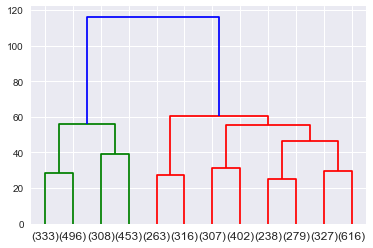

In [38]:
# Méthode de Ward
Link = linkage(X_quant_sc, 'ward')
dn = dendrogram(Link, p=12, truncate_mode='lastp')

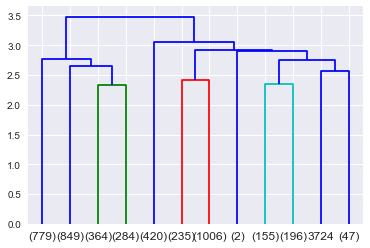

In [39]:
# Lien Moyen
Link = linkage(X_quant_sc, 'average')
dn = dendrogram(Link, p=12, truncate_mode='lastp')

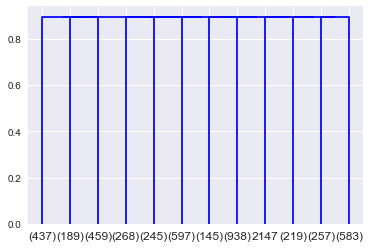

In [40]:
# Lien simple
Link = linkage(X_quant_sc, 'single')
dn = dendrogram(Link, p=12, truncate_mode='lastp')

## Agglomerative clustering

Il y a  5  clusters différents


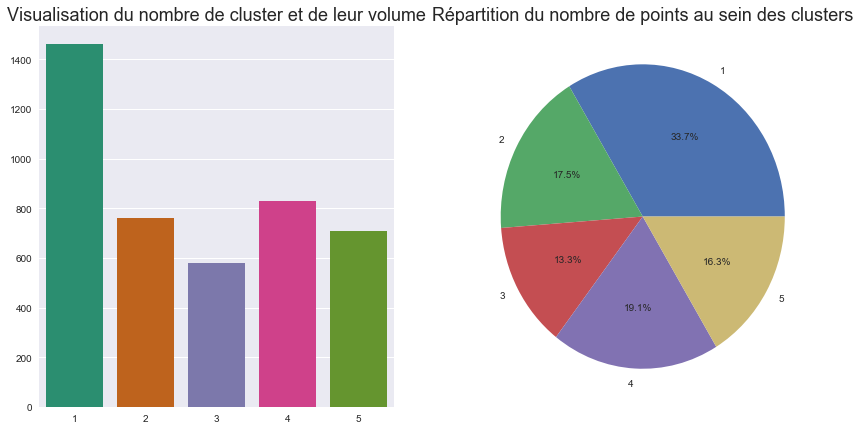

Silhouette Coefficient: 0.200


In [41]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage='ward', n_clusters=5)
model.fit(X_quant_sc)
cluster_count(model.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_quant_sc, model.labels_))

# K-Means

#### Implémentation de l'algorithme Kmeans pour différentes valeurs de n_clusters, visualisation et analyse des résultats

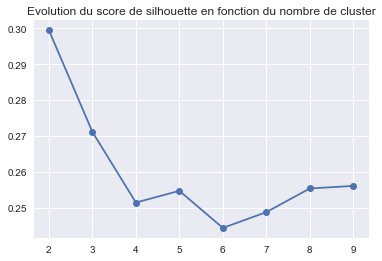

In [42]:
silhouette = []
for num_clusters in range(2, 10):
    cls = KMeans(n_clusters=num_clusters)
    cls.fit(X_quant_sc)
    silh = silhouette_score(X_quant_sc, cls.labels_)
    silhouette.append(silh)

plt.plot(range(2, 10), silhouette, marker='o')

plt.title('Evolution du score de silhouette en fonction du nombre de cluster')
plt.show()

Analyse pour deux clusters

Il y a  2  clusters différents


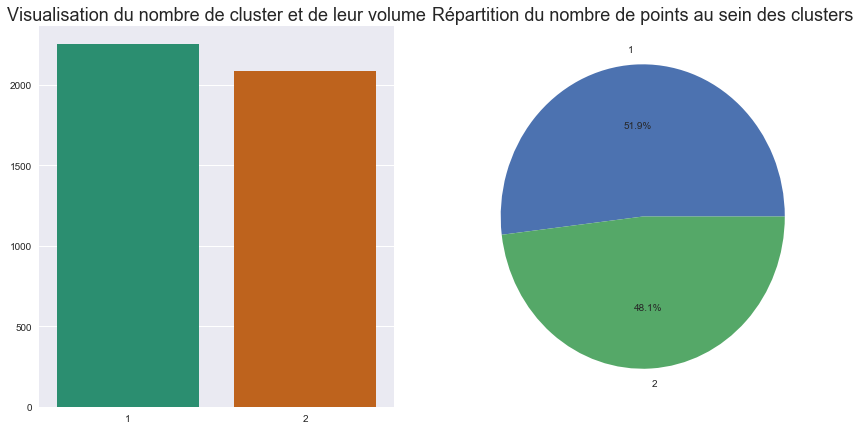

Silhouette Coefficient: 0.300


In [43]:
cls2 = KMeans(n_clusters=2)
cls2.fit(X_quant_sc)
cluster_count(cls2.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_quant_sc, cls2.labels_))

Il y a  3  clusters différents


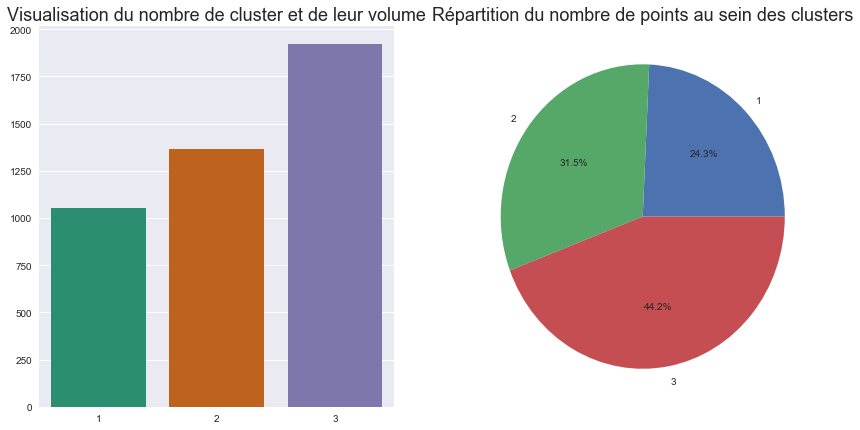

Silhouette Coefficient: 0.271


In [44]:
cls3 = KMeans(n_clusters=3)
cls3.fit(X_quant_sc)
cluster_count(cls3.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_quant_sc, cls3.labels_))

Il y a  4  clusters différents


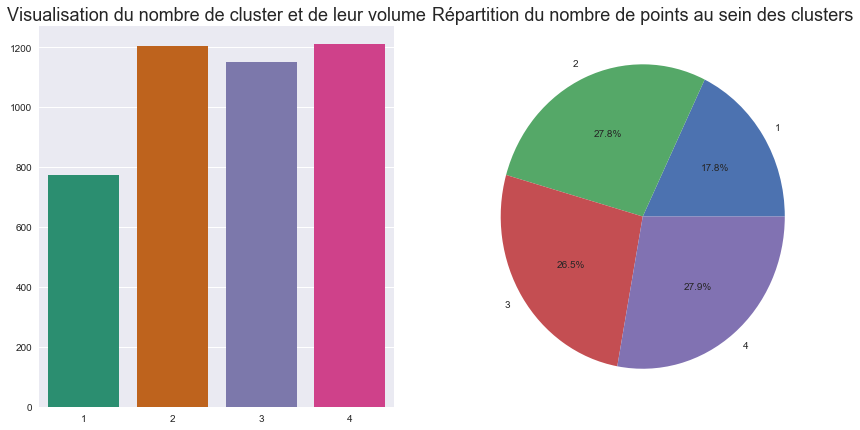

Silhouette Coefficient: 0.251


In [45]:
cls4 = KMeans(n_clusters=4)
cls4.fit(X_quant_sc)
cluster_count(cls4.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_quant_sc, cls4.labels_))

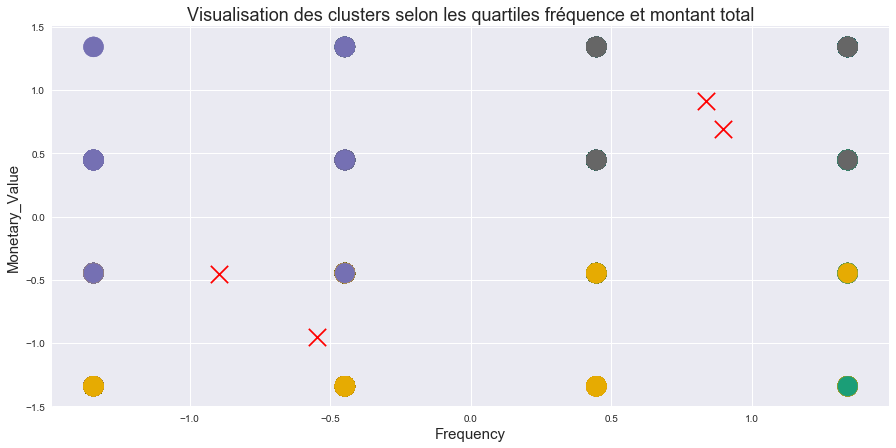

In [46]:
fig = plt.figure(figsize=(15, 7))

plt.scatter(X_quant_sc[:, 1], X_quant_sc[:, 2],
            c=cls4.labels_, alpha=1, cmap='Dark2', s=400)
plt.scatter(cls4.cluster_centers_[:, 1], cls4.cluster_centers_[
            :, 2], marker='x', c=['r'], s=300)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary_Value', fontsize=15)
plt.title('Visualisation des clusters selon les quartiles fréquence et montant total', fontsize=18)

plt.show()

Il y a  5  clusters différents


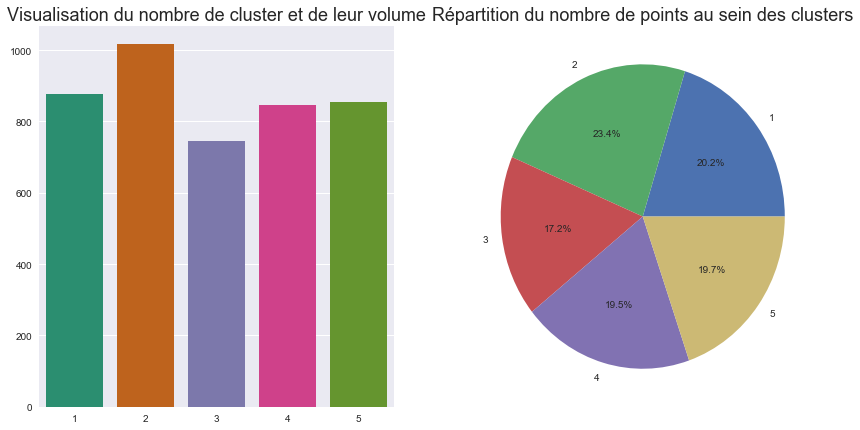

Silhouette Coefficient: 0.255


In [47]:
cls5 = KMeans(n_clusters=5)
cls5.fit(X_quant_sc)
cluster_count(cls5.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_quant_sc, cls5.labels_))

Silhouette Coefficient: 0.255


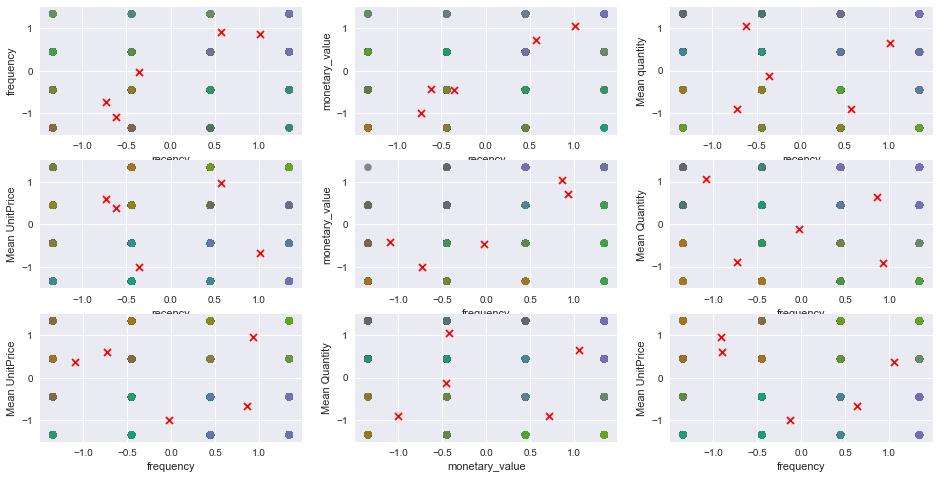

In [48]:
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X_quant_sc, cls5.labels_))
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(331)
ax.scatter(X_quant_sc[:, 0], X_quant_sc[:, 1],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 0], cls5.cluster_centers_[:, 1],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('recency')
ax.set_ylabel('frequency')

ax = fig.add_subplot(332)
ax.scatter(X_quant_sc[:, 0], X_quant_sc[:, 2],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 0], cls5.cluster_centers_[:, 2],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('recency')
ax.set_ylabel('monetary_value')

ax = fig.add_subplot(333)
ax.scatter(X_quant_sc[:, 0], X_quant_sc[:, 3],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 0], cls5.cluster_centers_[:, 3],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('recency')
ax.set_ylabel('Mean quantity')

ax = fig.add_subplot(334)
ax.scatter(X_quant_sc[:, 0], X_quant_sc[:, 4],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 0], cls5.cluster_centers_[:, 4],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('recency')
ax.set_ylabel('Mean UnitPrice')

ax = fig.add_subplot(335)
ax.scatter(X_quant_sc[:, 1], X_quant_sc[:, 2],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 1], cls5.cluster_centers_[:, 2],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency')
ax.set_ylabel('monetary_value')

ax = fig.add_subplot(336)
ax.scatter(X_quant_sc[:, 1], X_quant_sc[:, 3],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 1], cls5.cluster_centers_[:, 3],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency')
ax.set_ylabel('Mean Quantity')
              
ax = fig.add_subplot(337)
ax.scatter(X_quant_sc[:, 1], X_quant_sc[:, 4],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 1], cls5.cluster_centers_[:, 4],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency')
ax.set_ylabel('Mean UnitPrice')
              
ax = fig.add_subplot(338)
ax.scatter(X_quant_sc[:, 2], X_quant_sc[:, 3],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 2], cls5.cluster_centers_[:, 3],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('monetary_value')
ax.set_ylabel('Mean Quantity')
              
ax = fig.add_subplot(339)
ax.scatter(X_quant_sc[:, 2], X_quant_sc[:, 4],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 3], cls5.cluster_centers_[:, 4],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency')
ax.set_ylabel('Mean UnitPrice')
              

plt.show()

Il y a  7  clusters différents


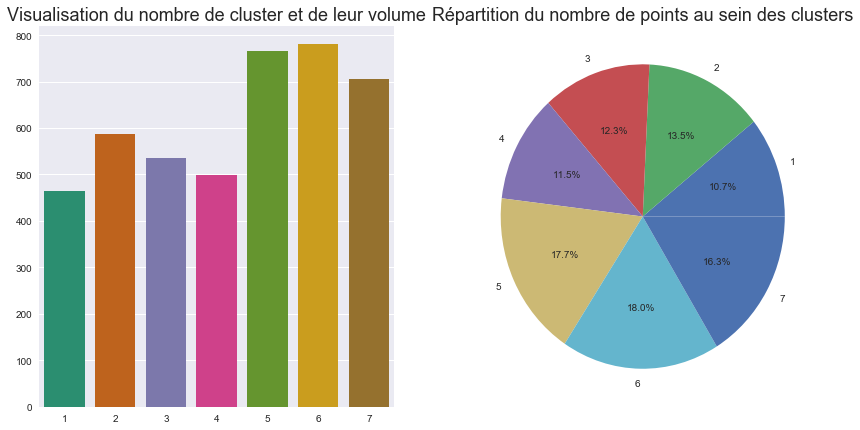

Silhouette Coefficient: 0.244


In [49]:
cls7 = KMeans(n_clusters=7)
cls7.fit(X_quant_sc)
cluster_count(cls7.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_quant_sc, cls7.labels_))

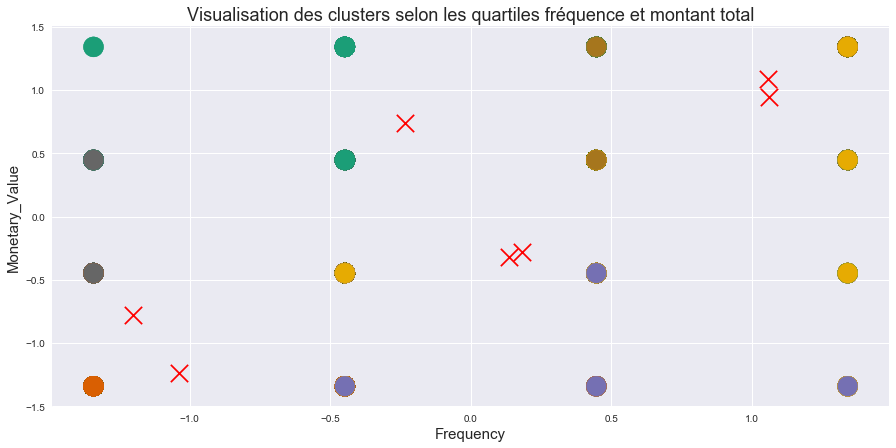

In [50]:
fig = plt.figure(figsize=(15, 7))

plt.scatter(X_quant_sc[:, 1], X_quant_sc[:, 2],
            c=cls7.labels_, alpha=1, cmap='Dark2', s=400)
plt.scatter(cls7.cluster_centers_[:, 1], cls7.cluster_centers_[
            :, 2], marker='x', c=['r'], s=300)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary_Value', fontsize=15)
plt.title('Visualisation des clusters selon les quartiles fréquence et montant total', fontsize=18)

plt.show()

## DBSCAN

[ -1   0   1 ...  -1 123 100]
Il y a  140  clusters différents


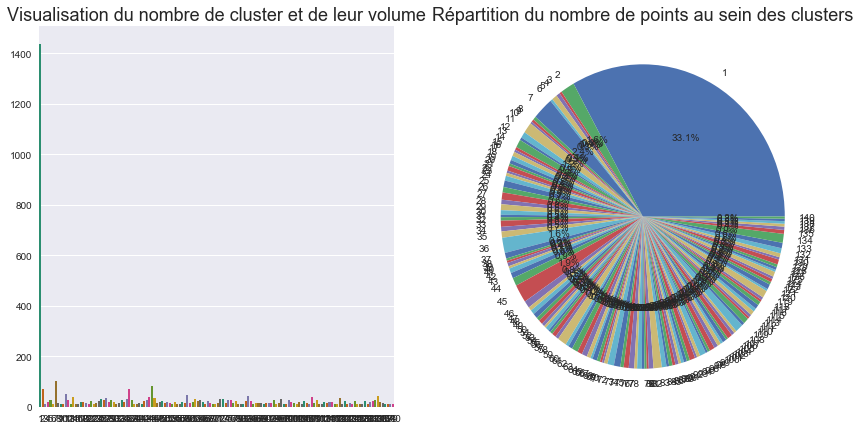

Silhouette Coefficient: 0.451


In [51]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN(eps=0.5, min_samples=10)
db.fit(X_quant_sc)
print(db.labels_)
cluster_count(db.labels_ + 1)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_quant_sc, db.labels_))

## tSNE

In [52]:
tsne2 = manifold.TSNE(n_components=2, perplexity=30, n_iter=5000, init='pca')
X_tsne2 = tsne.fit_transform(X_quant_sc)

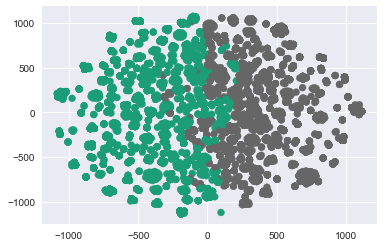

In [53]:
plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=cls2.labels_, cmap='Dark2')
plt.show()

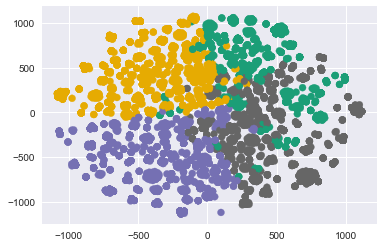

In [54]:
plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=cls4.labels_, cmap='Dark2')
plt.show()

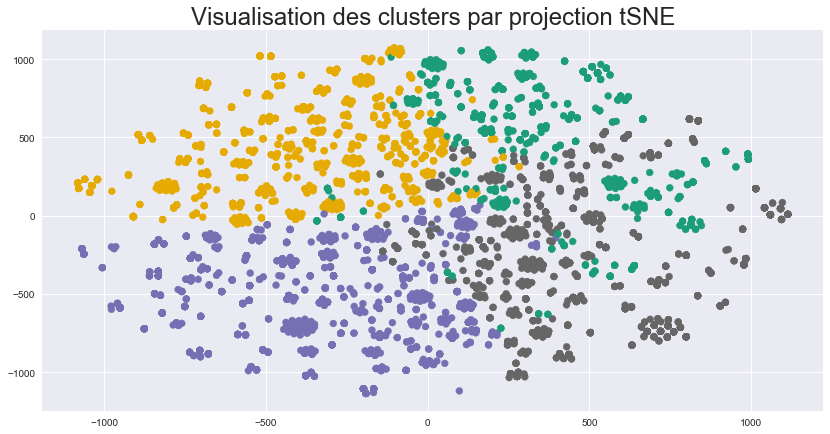

In [55]:
fig = plt.figure(figsize=(14, 7))
plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=cls4.labels_, cmap='Dark2')
plt.title('Visualisation des clusters par projection tSNE', fontsize = 24)
plt.show()

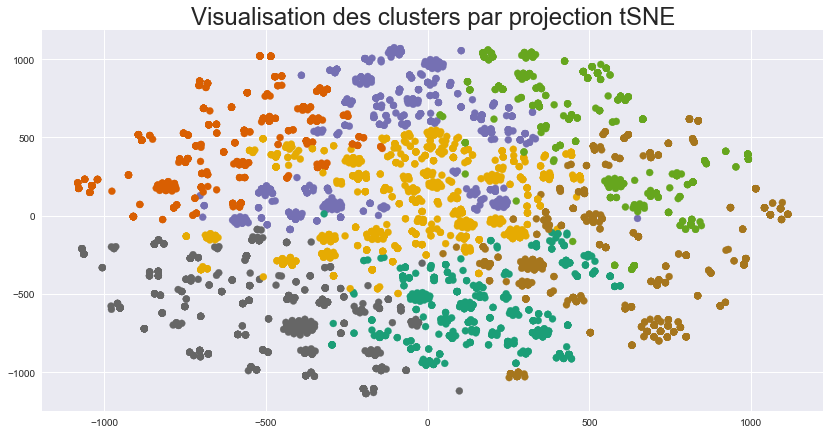

In [56]:
fig = plt.figure(figsize=(14, 7))
plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=cls7.labels_, cmap='Dark2')
plt.title('Visualisation des clusters par projection tSNE', fontsize = 24)
plt.show()